# WeatherPy

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Checking single City

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Asmara"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 15.3333,
        "lon": 38.9333
    },
    "dt": 1674584969,
    "id": 343300,
    "main": {
        "feels_like": 12.42,
        "grnd_level": 774,
        "humidity": 77,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 13.05,
        "temp_max": 13.05,
        "temp_min": 13.05
    },
    "name": "Asmara",
    "sys": {
        "country": "ER",
        "sunrise": 1674532467,
        "sunset": 1674573461
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 66,
        "gust": 1.75,
        "speed": 1.53
    }
}


In [12]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klyuchi
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | samarai
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | humaita
Processing Record 7 of Set 1 | didsbury
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | bonthe
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | wyndham
Processing Record 17 of Set 1 | belaya gora
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | amalapuram
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | jinchang
Processing Record 39 of Set 4 | neiafu
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | ilhabela
Processing Record 43 of Set 4 | parana
Processing Record 44 of Set 4 | del rio
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | khonuu
City not found. Skipping...
Processing Record 48 of Set 4 | la rioja
Processing Record 49 of Set 4 | reconquista
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | roma
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | zholymbet
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | yei
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of S

Processing Record 29 of Set 8 | enshi
Processing Record 30 of Set 8 | port keats
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | santa marta
Processing Record 34 of Set 8 | grindavik
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | businga
Processing Record 37 of Set 8 | baraboo
Processing Record 38 of Set 8 | nizhnevartovsk
Processing Record 39 of Set 8 | russell
Processing Record 40 of Set 8 | pundaguitan
Processing Record 41 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 42 of Set 8 | bogorodskoye
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | armidale
Processing Record 46 of Set 8 | diffa
Processing Record 47 of Set 8 | port moresby
Processing Record 48 of Set 8 | margate
Processing Record 49 of Set 8 | havoysund
Processing Record 0 of Set 9 | dinajpur
Processing Record 1 of Set 9 | tabiauea
City 

Processing Record 19 of Set 12 | casino
Processing Record 20 of Set 12 | myre
Processing Record 21 of Set 12 | naples
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | mikkeli
Processing Record 25 of Set 12 | shebalino
Processing Record 26 of Set 12 | suhbaatar
Processing Record 27 of Set 12 | rungata
City not found. Skipping...
Processing Record 28 of Set 12 | yamada
Processing Record 29 of Set 12 | niksar
Processing Record 30 of Set 12 | barreirinhas
Processing Record 31 of Set 12 | vanino
Processing Record 32 of Set 12 | maun
Processing Record 33 of Set 12 | ishigaki
Processing Record 34 of Set 12 | batemans bay
Processing Record 35 of Set 12 | lahijan
Processing Record 36 of Set 12 | itanagar
Processing Record 37 of Set 12 | esmeraldas
Processing Record 38 of Set 12 | mahanoro
Processing Record 39 of Set 12 | grand gaube
Processing Record 40 of Set 12 | pakala
Processing Record 41 of Set 1

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klyuchi,52.2667,79.1667,-12.56,94,97,5.15,RU,1674586062
1,bubaque,11.2833,-15.8333,23.79,79,95,7.63,GW,1674586063
2,samarai,-10.6167,150.6667,27.82,80,100,4.22,PG,1674586063
3,atuona,-9.8000,-139.0333,25.95,75,3,8.65,PF,1674586064
4,bambous virieux,-20.3428,57.7575,23.45,94,75,0.00,MU,1674586065


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,-12.56,94,97,5.15,RU,1674586062
1,bubaque,11.2833,-15.8333,23.79,79,95,7.63,GW,1674586063
2,samarai,-10.6167,150.6667,27.82,80,100,4.22,PG,1674586063
3,atuona,-9.8000,-139.0333,25.95,75,3,8.65,PF,1674586064
4,bambous virieux,-20.3428,57.7575,23.45,94,75,0.00,MU,1674586065


# Create the Scatter Plots Requested
Latitude Vs. Temperature

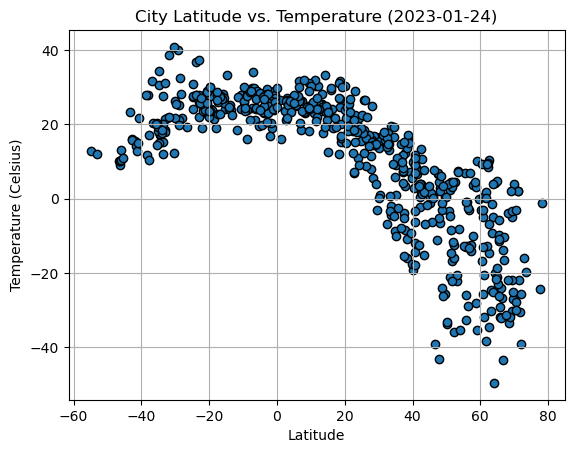

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

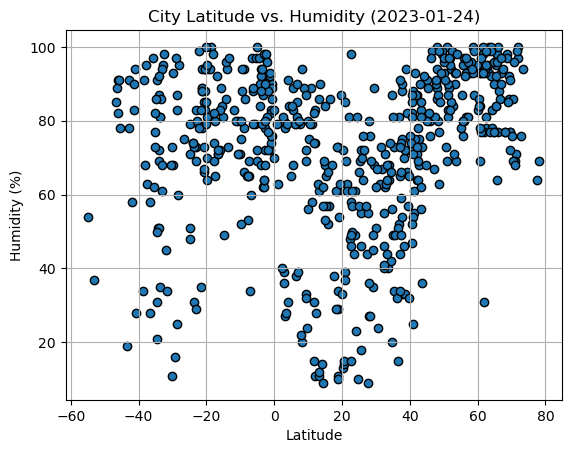

In [18]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

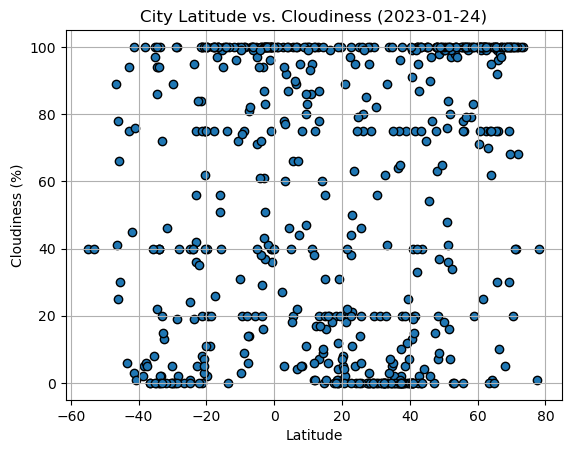

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

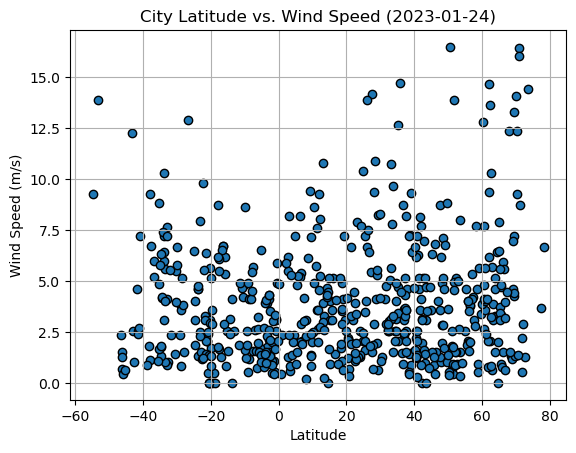

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [21]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,-12.56,94,97,5.15,RU,1674586062
1,bubaque,11.2833,-15.8333,23.79,79,95,7.63,GW,1674586063
6,didsbury,53.4170,-2.2315,7.40,90,100,1.54,GB,1674586066
9,thompson,55.7435,-97.8558,-25.91,76,0,2.06,CA,1674585917
11,albany,42.6001,-73.9662,1.87,75,87,5.16,US,1674585919


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,samarai,-10.6167,150.6667,27.82,80,100,4.22,PG,1674586063
3,atuona,-9.8000,-139.0333,25.95,75,3,8.65,PF,1674586064
4,bambous virieux,-20.3428,57.7575,23.45,94,75,0.00,MU,1674586065
5,humaita,-7.5061,-63.0208,29.77,69,81,1.56,BR,1674586065
7,hobart,-42.8794,147.3294,16.14,91,75,2.57,AU,1674586066


# Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6671732086723441
y = -0.75x +32.82


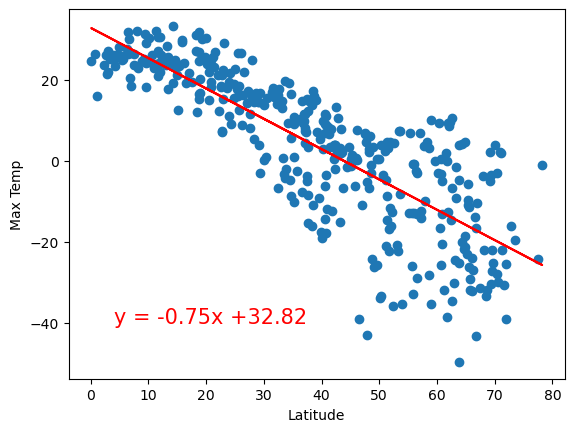

In [24]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp", (4,-40))

The r-value is: 0.2125679178467104
y = 0.19x +27.82


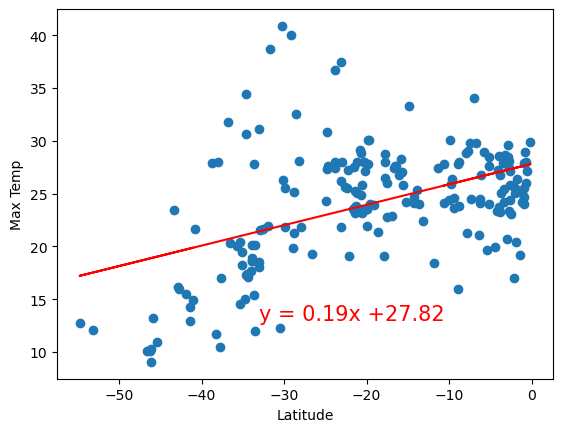

In [27]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp", (-33, 13))

Discussion about the linear relationship:
    
	The scatter plots show that in the northern hemisphere the temperature decreases as the latitude increases. The trend resembles a strong negative correlation suggesting colder overall climate in the negative hemisphere.
	The trend in the southern hemisphere is a moderately negative correlation. This suggests that climates are for the most part warmer in the southern hemisphere. 

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25998592615062305
y = 0.59x +47.8


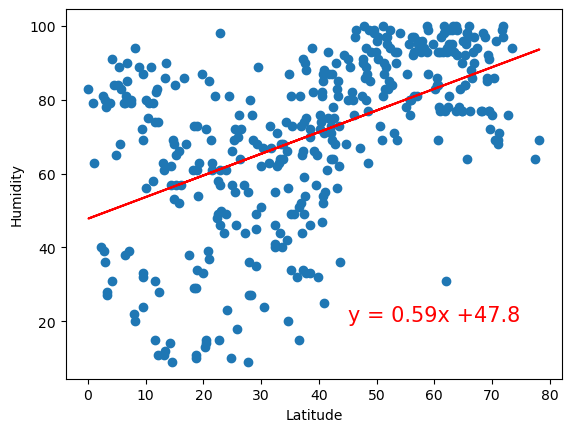

In [29]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-value is: 0.06529889289365667
y = 0.36x +82.64


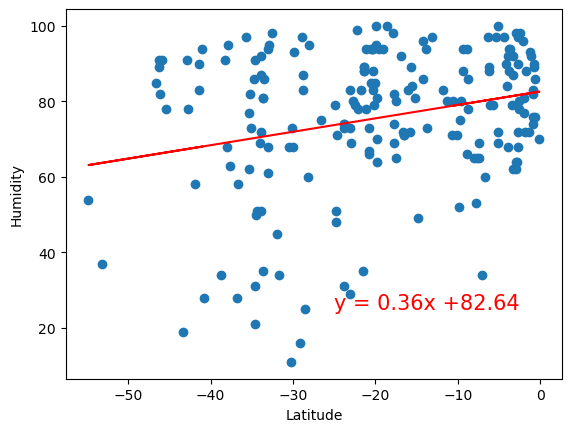

In [30]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", (-25, 25))


Discussion about the linear relationship:
    
The correlation for both Hemispheres resemble a positive correlation. The Northern Hemisphere has a stronger positive correlation than the southern although both are moderate.

This suggests that as you decrease in latitude the humidity will also. 

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07680809462157108
y = 0.58x +32.75


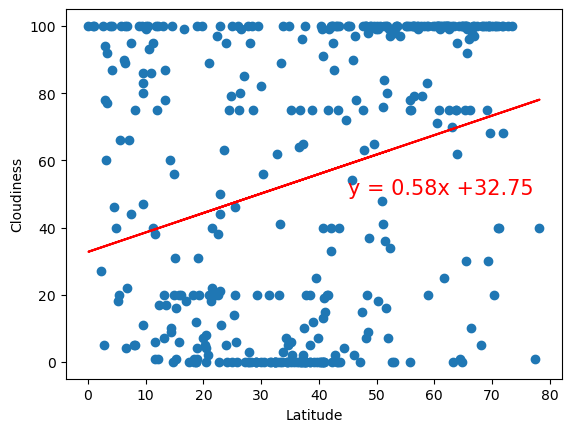

In [31]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", (45, 50))

The r-value is: 0.12735544046575778
y = 1.02x +76.99


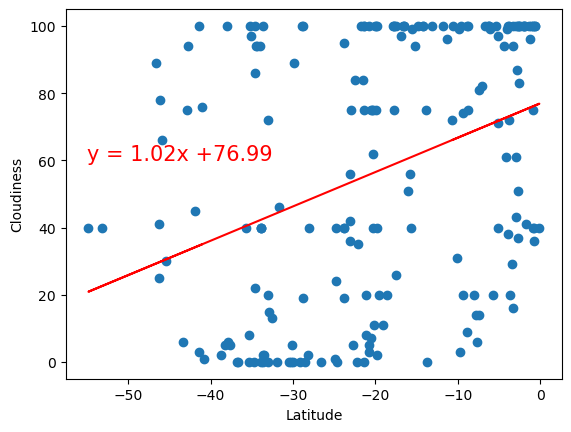

In [32]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 60))


Discussion about the linear relationship:

The correlation for both Hemispheres resemble a positive correlation. The Northern Hemisphere has a stronger positive correlation than the southern although both are moderate.

This suggests that as you decrease in latitude the cloudiness does also. 

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014096733056272518
y = 0.02x +3.34


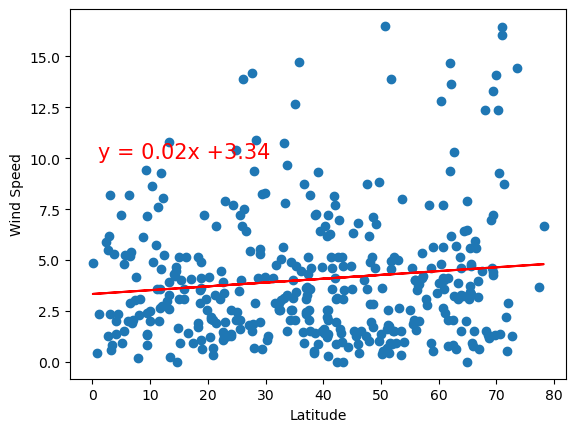

In [33]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", (1, 10))

The r-value is: 0.07737629586597868
y = -0.05x +2.35


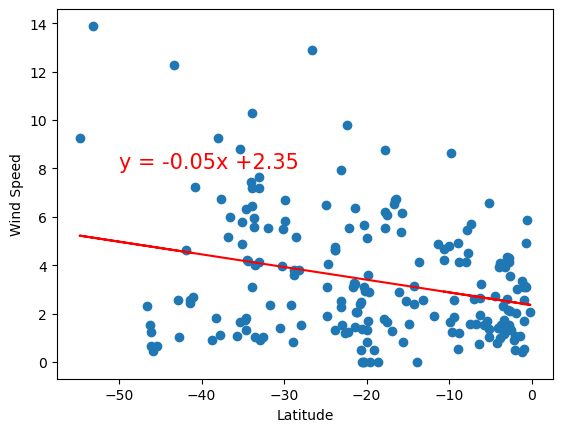

In [34]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 8))

Discussion about the linear relationship:
    
The trend for both hemispheres resemble a no correlation line plot. 

This suggest that latitude isn’t a determining factor in rationalizing wind speeds. 